In [1]:
%cd ..

/Users/mariusarlauskas/Desktop/Github/Map-Sim


In [2]:
from config.simulation import SimulationConfig
from src.population import Population, PopulationBuilder
from src.geometry import IzolationZone
from src.virus import Virus
from config.simulation import SimulationConfig

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('dark_background')
plt.rcParams['axes.grid'] = False


izolation_zone_config = [
    (850, 975, 'Kaunas'),
    (925, 1350, 'Vilnius'),
    (270, 975, 'Siauliai'),
    (270, 300, 'Klaipeda'),
    (1100, 975, 'Alytus'),
    (435, 1450, 'Vilnius'),
    ]

config = SimulationConfig()
izolations_zones = [IzolationZone(*zone) for zone in izolation_zone_config]

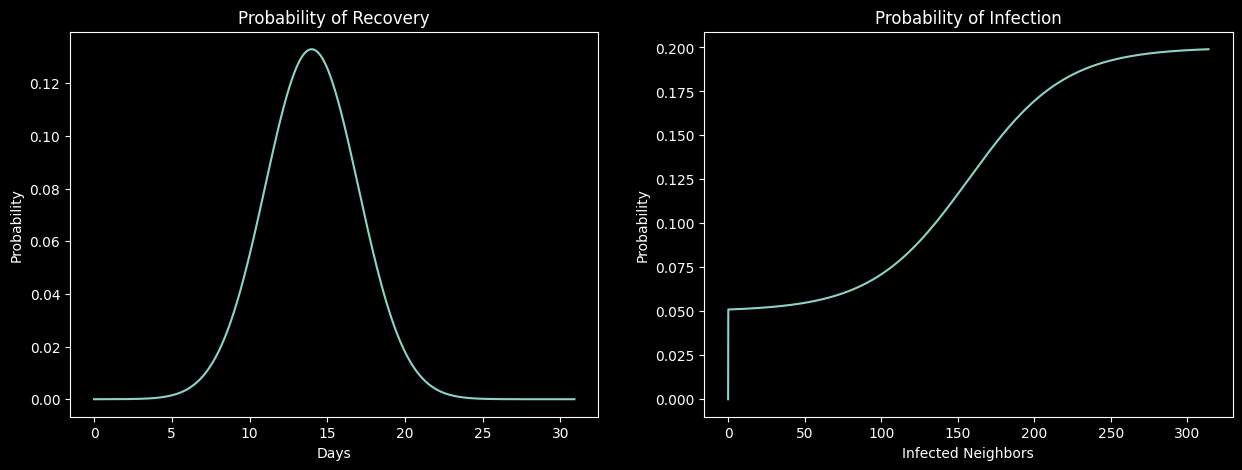

In [3]:
x = np.arange(0, 31, 0.1)
y = [Virus.get_well_proba(i) for i in x]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(x, y)
ax[0].set_title("Probability of Recovery")
ax[0].set_xlabel("Days")
ax[0].set_ylabel("Probability")

x = np.arange(0, 3.14 * SimulationConfig.infection_reach**2, 0.1)
y = [Virus.get_infection_proba(i) for i in x]

ax[1].plot(x, y)
ax[1].set_title("Probability of Infection")
ax[1].set_xlabel("Infected Neighbors")
ax[1].set_ylabel("Probability")
plt.show()

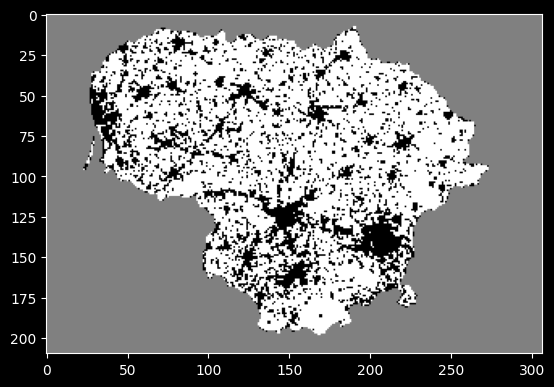

In [4]:
from skimage.filters import median
from skimage.transform import resize


image = plt.imread('input/pop_density.png')
filter_image = image[:,:,3]

image_height, image_width = image.shape[:2]

image = image[:,:,1]
image = median(image)

image = resize(image, (image_height*config.resize_factor, image_width*config.resize_factor), anti_aliasing=True)
filter_image = resize(filter_image, (image_height*config.resize_factor, image_width*config.resize_factor), anti_aliasing=True)

image[image > config.pixel_density_threshold] = 1
image[image <= config.pixel_density_threshold] = 0
image[filter_image < 0.5] = 0.5


plt.imshow(image, cmap='gray')
plt.show()

In [5]:
population = PopulationBuilder(image, izolations_zones, config.initial_infected_coords).build()

In [6]:
population

Population({'day': 0, 'infected': 0, 'recovered': 0, 'susceptible': 22158, 'people': 22158})